In [ ]:
!mkdir ../checkpoints
!wget https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth -P ../checkpoints

In [12]:
from mmcv.cnn.utils import revert_sync_batchnorm


ImportError: cannot import name 'revert_sync_batchnorm' from 'mmcv.cnn.utils' (c:\Users\LBW\anaconda3\envs\torch\lib\site-packages\mmcv\cnn\utils\__init__.py)

In [2]:
import torch
import matplotlib.pyplot as plt
from mmengine.model.utils import revert_sync_batchnorm
from mmseg.apis import init_model, inference_model, show_result_pyplot

In [3]:
config_file = 'C:\Workspace\ccp\mmsegmentation\configs\segformer\segformer_mit-b0_8xb2-160k_ade20k-512x512.py'
checkpoint_file = 'C:\Workspace\ccp\mmsegmentation\checkpoints\segformer_mit-b0_512x512_160k_ade20k_20220617_162207-c00b9603.pth'

In [4]:
# build the model from a config file and a checkpoint file

device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')
print(device)

model = init_model(config_file, checkpoint_file, device=device)

cuda:0
Loads checkpoint by local backend from path: C:\Workspace\ccp\mmsegmentation\checkpoints\segformer_mit-b0_512x512_160k_ade20k_20220617_162207-c00b9603.pth


c:\Users\LBW\anaconda3\envs\torch\lib\site-packages\mmseg\models\builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
c:\Users\LBW\anaconda3\envs\torch\lib\site-packages\mmseg\models\losses\cross_entropy_loss.py:250: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


In [5]:
# test a single image
img = 'demo.png'
if not torch.cuda.is_available():
    model = revert_sync_batchnorm(model)
result = inference_model(model, img)

c:\Users\LBW\anaconda3\envs\torch\lib\site-packages\mmengine\visualization\visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


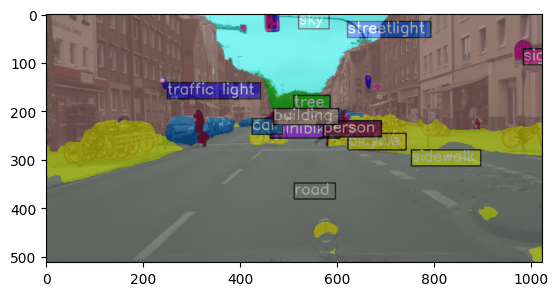

In [6]:
# show the results
vis_result = show_result_pyplot(model, img, result, show=False)
plt.imshow(vis_result)